In [153]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [154]:
def plot_errsig_2(dw_range, phasediff, loss, r=np.sqrt(0.95), nfiber=1.5, Lfiber=2, c=2.998e8):
    # dw_range is MHz
    para1 = r - (1 - r**2) * (np.exp(-1j*nfiber*dw_range*Lfiber/c*1e6)) / (1 - r*loss*np.exp(-1j*nfiber*dw_range*Lfiber/c*1e6))
    errsig = np.sqrt(para1 * para1.conjugate()) * (para1.imag * np.cos(phasediff) + para1.real * np.sin(phasediff))
#     errsig = (para1.imag * np.cos(phasediff) + para1.real * np.sin(phasediff))
#     errsig = np.sqrt(para1 * para1.conjugate())
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(dw_range, errsig, '-')
    ax.set_title('Error Signal')
    ax.set_xlabel('Frequency Deviation (MHz)')
    ax.set_ylabel('Error Signal (a.u.)')
    plt.show()

<IPython.core.display.Javascript object>


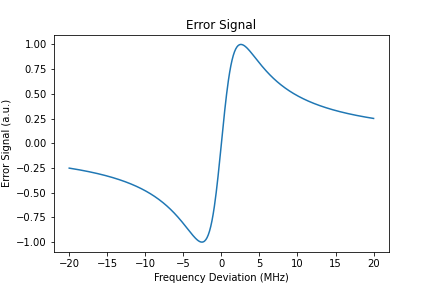

C:\Users\Administrator\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [155]:
plot_errsig_2(dw_range=np.linspace(-20, 20, 500), phasediff=0, loss=1)

$$
\text{Error Signal} \propto \sin{\Delta \phi}\sqrt{I(\Delta \omega)}t^{2}\frac{\sin{n\Delta \omega L/c}}{1+r^{2}\mathcal{L}^{2} - 2r\mathcal{L}\cos{n\Delta \omega L/c}}
$$

In [156]:
def plot_errsig(dw_range, phasediff, loss, r=np.sqrt(0.95), nfiber=1.5, Lfiber=2, c=2.998e8):
    # dw_range is MHz
    para1 = r - (1 - r**2) * (np.exp(-1j*nfiber*dw_range*Lfiber/c*1e6)) / (1 - r*loss*np.exp(-1j*nfiber*dw_range*Lfiber/c*1e6))
    errsig = np.sin(phasediff) * np.sqrt(para1 * para1.conjugate()) * (1 - r**2) * (
                (np.sin(nfiber*dw_range*Lfiber/c*1e6))/(1 + r**2 * loss**2 - 2*r*loss*np.cos(nfiber*dw_range*Lfiber/c*1e6)))
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(dw_range, errsig, '-')
    ax.set_title('Error Signal')
    ax.set_xlabel('Frequency Deviation (MHz)')
    ax.set_ylabel('Error Signal (a.u.)')
    plt.show()

<IPython.core.display.Javascript object>


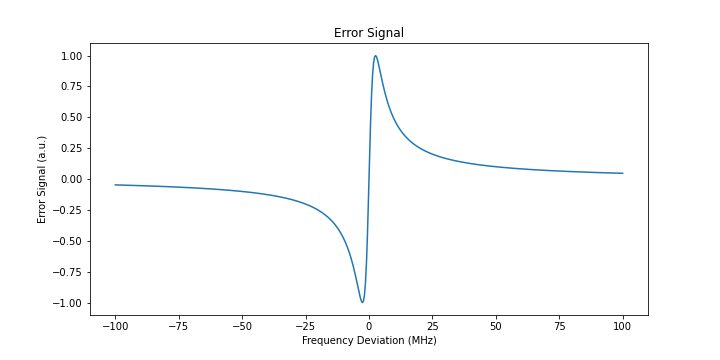

C:\Users\Administrator\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [157]:
plot_errsig(dw_range=np.linspace(-100, 100, 500), phasediff=np.pi/2, loss=1)

define function <br/>
extract background & normalize error signal

In [158]:
def extract_background(data):
    # data: 2darray
    datai, dataf = (data[0, 0], data[1, 0]), (data[0, -1], data[1, -1])
    def bgline(x):
        return (dataf[1] - datai[1]) * (x - datai[0]) / (dataf[0] - datai[0]) + datai[1]
    x = data[0]
    y_raw = data[1]
    y_bg = bgline(x)
    y_mod = y_raw - y_bg
    data_mod = np.array([x, y_mod])
    return data_mod

In [159]:
def normalize_errsig(errsig_raw, transm_raw):
    errsig_mod = extract_background(errsig_raw)
    transm_mod = extract_background(transm_raw)
    nozeroind = transm_mod[1] != 0
#     errsig_nom = np.array([errsig_mod[0][nozeroind], errsig_mod[1][nozeroind] / np.sqrt(transm_mod[1][nozeroind])])
    errsig_nom = np.array([errsig_mod[0][nozeroind], errsig_mod[1][nozeroind] / transm_mod[1][nozeroind]])
    return errsig_nom

raw data

In [160]:
trans_raw = np.loadtxt('err_sig_phase_1802.dat')
errsig_raw = np.loadtxt('err_sig_phase_1803.dat')

<IPython.core.display.Javascript object>


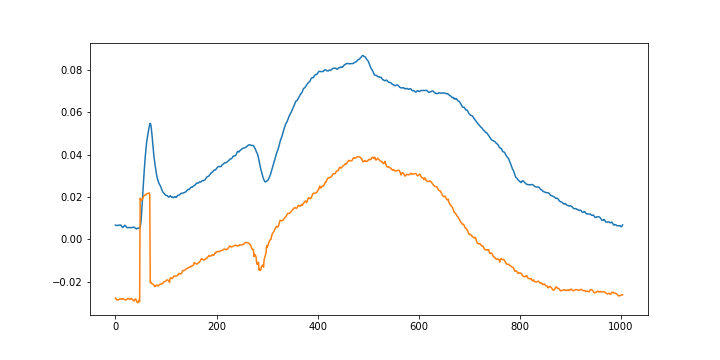

In [161]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(trans_raw)
ax.plot(errsig_raw)

In [162]:
trans = trans_raw[40:]
errsig = errsig_raw[40:]

In [163]:
freq_range = np.linspace(-40, 40, len(trans))
print(len(freq_range))

964


<IPython.core.display.Javascript object>


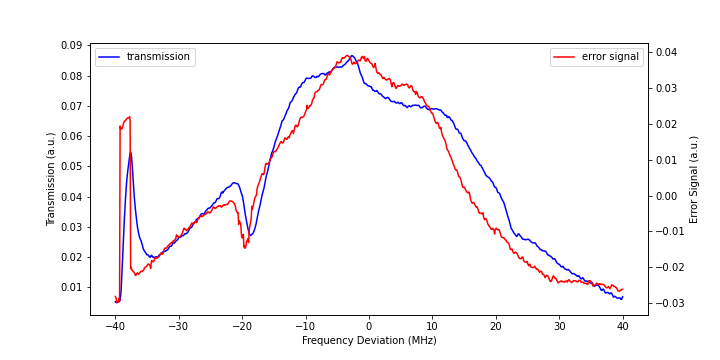

In [164]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(freq_range, trans, 'b-', label='transmission')
ax_ = ax.twinx()
ax_.plot(freq_range, errsig, 'r-', label='error signal')
ax.set_xlabel('Frequency Deviation (MHz)')
ax.set_ylabel('Transmission (a.u.)')
ax_.set_ylabel('Error Signal (a.u.)')
ax.legend(loc='upper left')
ax_.legend(loc='upper right')
plt.show()

normalize

<IPython.core.display.Javascript object>


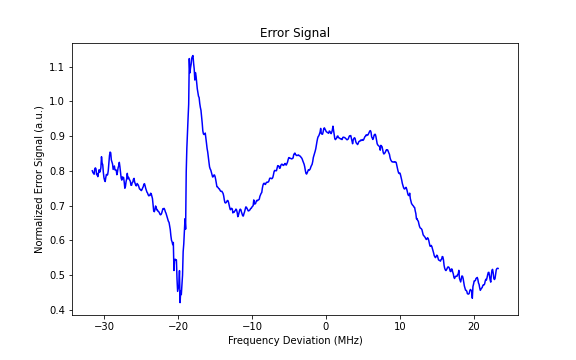

In [165]:
errsig_rawxy = np.array([freq_range, errsig])
trans_rawxy = np.array([freq_range, trans])

errsig_nom = normalize_errsig(errsig_raw=errsig_rawxy, transm_raw=trans_rawxy)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(errsig_nom[0][100:-200], errsig_nom[1][100:-200], 'b-')
ax.set_xlabel('Frequency Deviation (MHz)')
ax.set_ylabel('Normalized Error Signal (a.u.)')
ax.set_title('Error Signal')
plt.show()